In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), './utils')))
import _utils as utils
from collections import OrderedDict
%matplotlib inline

In [2]:
# Import formatted data
df_2017_results = pd.read_csv('2017_Final_Clean.csv')
df_2018_results = pd.read_csv('2018_Final_Clean.csv')

In [3]:
# Needed as results were concated w/ missing results from parsing.
# I am sorting by place as to retain order
df_2017_results = df_2017_results.sort_values(by=['Place'])
df_2018_results = df_2018_results.sort_values(by=['Place'])

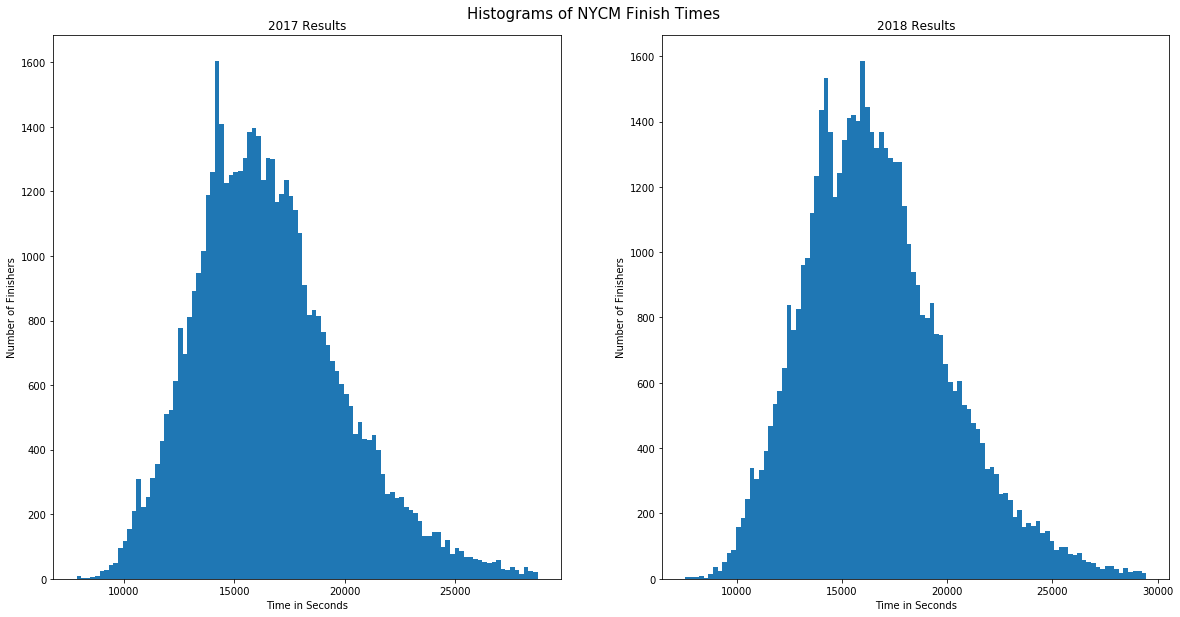

In [4]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Histograms of NYCM Finish Times', fontsize=15, y=0.92)

plt.subplot(121)
plt.hist(df_2017_results['Time'], bins = 100)
plt.xlabel('Time in Seconds', fontsize=10)
plt.ylabel('Number of Finishers', fontsize=10)
plt.title('2017 Results')


plt.subplot(122)
plt.hist(df_2018_results['Time'], bins = 100)
plt.xlabel('Time in Seconds', fontsize=10)
plt.ylabel('Number of Finishers', fontsize=10)
plt.title('2018 Results')

plt.show()

The above histograms show a slightly positively scewed normal distribution for both the 2017 and 2018 finishers.

Text(0, 0.5, 'Time in Seconds')

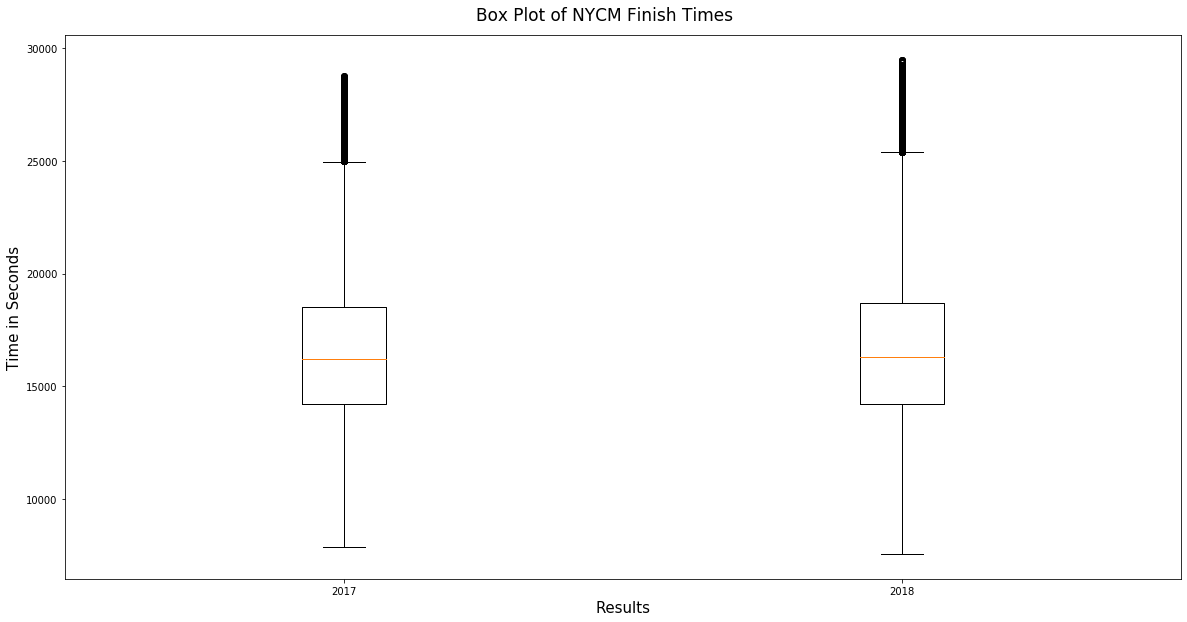

In [5]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Box Plot of NYCM Finish Times', fontsize=17, y=0.92)

plt.boxplot([df_2017_results['Time'], df_2018_results['Time']], labels = ['2017','2018'])
plt.xlabel('Results', fontsize=15)
plt.ylabel('Time in Seconds', fontsize=15)

In [6]:
# Get mean times
mean_2017_times = df_2017_results['Time'].mean()
mean_2018_times = df_2018_results['Time'].mean()

In [7]:
# Quantile values for 2017
df_2017_results.Time.quantile([.25,.75])

0.25    14229.0
0.75    18523.0
Name: Time, dtype: float64

In [8]:
# Quantile values for 2018
df_2018_results.Time.quantile([.25,.75])

0.25    14217.00
0.75    18685.25
Name: Time, dtype: float64

In [9]:
# Mean Finish Times
print('2017 Mean Finish Time: {:.2f}'.format(mean_2017_times))
print('2018 Mean Finish Time: {:.2f}'.format(mean_2018_times))
print()

# Median Finish Times
print('2017 Median Finish Time: {}'.format(df_2017_results['Time'].median()))
print('2018 Median Finish Time: {}'.format(df_2018_results['Time'].median()))
print()

# Max Finish Times
print('2017 Max Finish Time: {}'.format(df_2017_results['Time'].max()))
print('2018 Max Finish Time: {}'.format(df_2018_results['Time'].max()))
print()

# Max Finish Times
print('2017 Min Finish Time: {}'.format(df_2017_results['Time'].min()))
print('2018 Min Finish Time: {}'.format(df_2018_results['Time'].min()))

2017 Mean Finish Time: 16579.83
2018 Mean Finish Time: 16669.72

2017 Median Finish Time: 16206.5
2018 Median Finish Time: 16298.0

2017 Max Finish Time: 28751
2018 Max Finish Time: 29472

2017 Min Finish Time: 7853
2018 Min Finish Time: 7559


In [10]:
# Standard Deviation of Times
print('2017 Standard Deviation of Finish Times: {}'.format(df_2017_results['Time'].std()))
print('2018 Standard Deviation of Finish Times: {}'.format(df_2018_results['Time'].std()))

2017 Standard Deviation of Finish Times: 3310.5049233958625
2018 Standard Deviation of Finish Times: 3421.9929149798745


In [11]:
# Number of Male and Female Finishers 2017
df_2017_results['Sex'].value_counts()

M    29586
F    21014
Name: Sex, dtype: int64

In [12]:
# Number of Male and Female Finishers 2018
df_2018_results['Sex'].value_counts()

M    30654
F    22146
Name: Sex, dtype: int64

The above exploritory analysis is leading to show that the runner field in 2017 is faster than 2018. This is shown with the mean finish time being 16580 seconds in 2017 vs. 16670 seconds in 2018 along with the median finish time being 16206.5 seconds in 2017 vs. 16298.0 seconds in 2018. This is further tested in the next section as the first quantile for 2018, 14217.00 seconds, is lower than 2017, 14229.0, and the min finish time for 2018, 7559 seconds, is faster than 2017, 7853 seconds.

## Hypothesis Testing & Further Dive into Data

First I will be testing wether the field of runners is indeed faster in 2017 vs. 2018 using a Ttest then checking the results using a bootstap test.

In [13]:
# State hypothesis
null_hypothesis = 'Runner field is relatively the same'
alternate_hypothesis = 'Runner field is not the same'

mean_difference = mean_2018_times - mean_2017_times

tDistYears = stats.t(loc = 0, scale = np.sqrt(utils.pooled_variance(df_2018_results['Time'], df_2017_results['Time'])), df = len(df_2017_results['Time']) + len(df_2018_results['Time']) - 2)

Text(0.5, 0.92, 'T-Dist of 2017, 2018 Running Times')

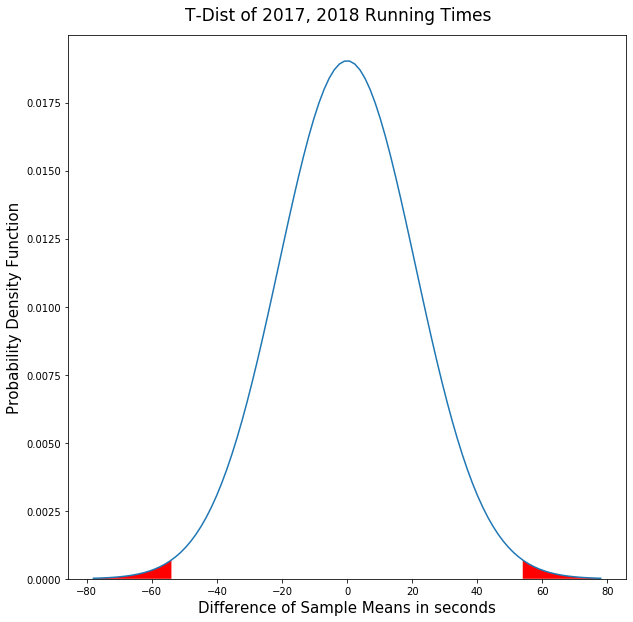

In [14]:
fig = plt.figure(figsize=(10,10))

x = np.linspace(tDistYears.ppf(0.0001), tDistYears.ppf(0.9999), 100)
plt.plot(x, tDistYears.pdf(x))
X_fill = np.linspace(tDistYears.ppf(0.0001), tDistYears.ppf(0.005))
Y = tDistYears.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
X_fill = np.linspace(tDistYears.ppf(0.995), tDistYears.ppf(0.9999))
Y = tDistYears.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference of Sample Means in seconds', fontsize=15)
plt.ylabel('Probability Density Function', fontsize=15)
fig.suptitle('T-Dist of 2017, 2018 Running Times', fontsize=17, y=0.92)

In [15]:
print(null_hypothesis if (mean_difference < tDistYears.ppf(.995)) and (diffMean > tDistYears.ppf(.005)) else alternate_hypothesis)
print('Chance of false postive: {}%'.format((1- tDistYears.cdf(mean_difference)) * 2))
print()

print('Cutoff above: {}'.format(tDistYears.ppf(.995)))
print('Cutoff below: {}'.format(tDistYears.ppf(.005)))
print('Difference of the means: {}'.format(mean_difference))

Runner field is not the same
Chance of false postive: 1.7872750918579428e-05%

Cutoff above: 53.969927621286615
Cutoff below: -53.96992762128662
Difference of the means: 89.88714015151345


First TTest shows that the runner field is not the same. Next is to test and see if 2017 is indeed faster than 2018

In [16]:
# Second hypothesis test
null_hypothesis = '2018 and 2017 had similiar fields'
alternate_hypothesis = '2018 had a faster field of runners'

print(null_hypothesis if mean_difference < tDistYears.ppf(.95) else alternate_hypothesis)
print('Chance of false postive: {}%'.format(1- tDistYears.cdf(mean_difference)))

print('\nCutoff above: {}'.format(tDistYears.ppf(.95)))
print('Difference of the means: {}\n'.format(mean_difference))

#Difference is so large. Try w/ 1%
print(null_hypothesis if mean_difference < tDistYears.ppf(.99) else alternate_hypothesis)
print('Cutoff above w/ 1%: {}'.format(tDistYears.ppf(.99)))

2018 had a faster field of runners
Chance of false postive: 8.936375459289714e-06%

Cutoff above: 34.46338143484639
Difference of the means: 89.88714015151345

2018 had a faster field of runners
Cutoff above w/ 1%: 48.74253699321249


The above TTest shows that it is indeed true that the runner field in 2017 was faster than the runner field in 2018. Next I will run I bootstrap test to confirm that these results are not due to randomness.

In [17]:
# Check w/ bootstrap test to see if this is due to randomness
bootData = []

timeToFinish17 = list(df_2017_results['Time'])
timeToFinish18 = list(df_2018_results['Time'])

np.random.seed(42)
for v in range(10000):
    total = timeToFinish17 + timeToFinish18
    np.random.shuffle(total)
    new17 = total[:len(timeToFinish17)]
    new18 = total[len(timeToFinish17):]
    bootData.append(np.mean(new18) - np.mean(new17))

Text(0.5, 1.0, 'Bootstap Test of 2017/2018 Running Fields')

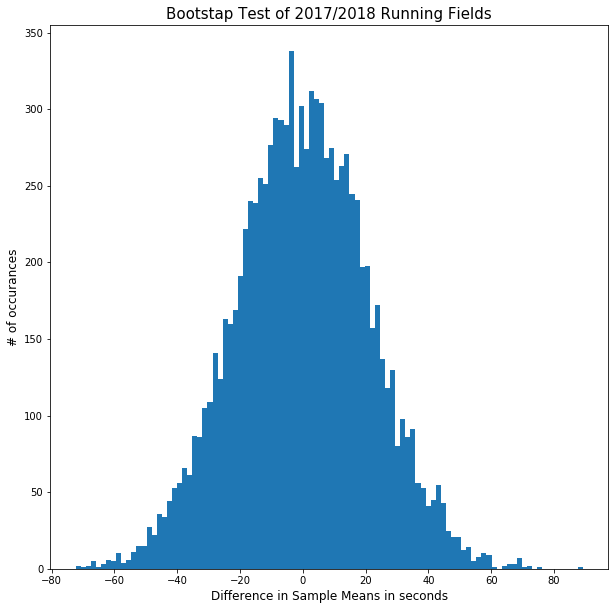

In [22]:
plt.figure(figsize=(10,10))

plt.hist(bootData, bins = 100)
plt.xlabel('Difference in Sample Means in seconds', fontsize = 12)
plt.ylabel('# of occurances', fontsize = 12)
plt.title('Bootstap Test of 2017/2018 Running Fields', fontsize = 15)

In [21]:
1 - stats.percentileofscore(bootData, mean_difference) * .01

0.0

The above bootstrap test shows that this the t test results is not due to randomness as our p value is ~0

## Breakdown of year means to see if a particular age group is changing the mean finish time

After the above test, the nexts steps are to see what is making the largest difference from 2017 to 2018.

In [31]:
df_2018_results['Div'].unique()

array(['M25-29', 'M20-24', 'M30-34', 'M35-39', 'M40-44', 'F35-39',
       'F30-34', 'F25-29', 'M45-49', 'F40-44', 'F20-24', 'M50-54',
       'M55-59', 'M18-19', 'F18-19', 'M60-64', 'F45-49', 'F50-54',
       'F55-59', 'M65-69', 'M70-74', 'F60-64', 'F70-74', 'F65-69',
       'M75-79', 'F75-79', 'M80-89', 'F80-89'], dtype=object)

In [66]:
mean_age_2017 = {key[1:]:0 for key in df_2017_results['Div'].unique()}
mean_age_2018 = {key[1:]:0 for key in df_2018_results['Div'].unique()}
participants_age_2017 = {key[1:]:0 for key in df_2017_results['Div'].unique()}
participants_age_2018 = {key[1:]:0 for key in df_2017_results['Div'].unique()}


for group in df_2017_results['Div'].unique():
    participants_age_2017[group[1:]] += len(df_2017_results[df_2017_results['Div'] == group]['Time'])
    mean_age_2017[group[1:]] += df_2017_results[df_2017_results['Div'] == group]['Time'].mean() / 2
    
for group in df_2018_results['Div'].unique():
    participants_age_2018[group[1:]] += len(df_2018_results[df_2018_results['Div'] == group]['Time'])
    mean_age_2018[group[1:]] += df_2018_results[df_2018_results['Div'] == group]['Time'].mean() / 2
    
mean_age_2017 = OrderedDict(sorted(mean_age_2017.items()))
mean_age_2018 = OrderedDict(sorted(mean_age_2018.items()))

In [53]:
len(mean_age_2017)

14

In [54]:
len(mean_age_2018)

14

Same number of keys. Can compute difference w/ simple logic

In [63]:
diff_check = {}
for group in mean_age_2017:
    mean_diff = mean_age_2017[group] - mean_age_2018[group]
    if abs(mean_diff) > 120:
        diff_check[group] = mean_diff
        print('{}: {:.2f}'.format(group, mean_diff))

18-19: -432.98
50-54: -123.40
60-64: -285.28
70-74: 310.00
75-79: -1398.41
80-89: -2257.21


Largest contributors seems to be 80 - 89 age group, but next is to check number of participants to see who is the actual largest influencer

In [75]:
print('\t2017 vs 2018')
for group in diff_check:
            print('{}: {}    {}'.format(group,participants_age_2017[group], participants_age_2018[group]))

	2017 vs 2018
18-19: 115    130
50-54: 5766    6167
60-64: 1610    1833
70-74: 245    274
75-79: 54    74
80-89: 11    13


The largest Contributor now seems to be the 50 - 54 age group as their field size was 6167 participants

## Conclusion

Through the above tests, it has come to be seen that the 2017 field of runners was faster than the 2018 runners. These results come as a surprise as the weather was rainy race day 2017 while running conditions were perfect for 2018. It would be interesting to further test to see if the larger field of runners is from the averagely slower running fields coming out due to the nice weather and if wet & cold weather keeps slow runners from participating due to disconfort. 
    These tests are beyond the scope of these data sets as analysis would need to be run accross multple races and keep track of individual user's participation habits.

# Self-Assessment

Like I rather enjoyed the project in it's entirety. From choosing your data, or scraping in my case, to developing hypothesis to test on real world data. In the beginning my plan was to use correctional facility data, but I ran into issues as the data was behind a privacy wall. The second, and final, choice was the above which turned out to peak my interest a more as I work at NYRR. The problem is that the results are not readily available which led to me scraping marathguide.com using slenium and then cleaning/formatting the data using python scripts. This challenge was a blessing and a curse as I learned more about webscraping using browsers rather than just using the urllib.request library like I have in the past. All in all, it helped further my understanding of creating a hypothesis and what data to use from a use in a real world setting.